In [9]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#Constants
data_file = "Zillow_pivot_cleaned.csv"
label_file = "Phoenix_Zillow_Codes.xlsx"

In [72]:
labelsdf = pd.read_excel(label_file)
labelsdf = labelsdf.drop(labelsdf.columns[2],axis=1)
#labelsdf["code"] = labelsdf["code"].astype(str)
labelsdf

,code,description
0,C36159_BSICG,median market value of buyer seller index cross
1,C36159_BSICT,median market value of buyer seller index cros...
2,C36159_DOZ,median market value of days on zillow
3,C36159_FOR10K,"median market value of foreclosures per 10,000..."
4,C36159_MDLNSAH,median market value of median daily listings -...
5,C36159_MDLSAAH,median market value of median daily listings -...
6,C36159_MLNSAH,median market value of monthly listings - nsa ...
7,C36159_MLSAAH,median market value of monthly listings - sa -...
8,C36159_MTURN,median market value of monthly turnover
9,C36159_NMLNSAH,median market value of new monthly listings - ...


In [41]:
# Read pivot data
df = pd.read_csv(data_file,parse_dates=['Date'])
# Set data type for series
for code in df.columns:
    if code!='Date':
        df[code] = df[code].astype(float)
print(df.dtypes)
df.head()

Date              datetime64[ns]
C36159_BSICG             float64
C36159_BSICT             float64
C36159_DOZ               float64
C36159_FOR10K            float64
C36159_MDLNSAH           float64
C36159_MDLSAAH           float64
C36159_MLNSAH            float64
C36159_MLSAAH            float64
C36159_MTURN             float64
C36159_NMLNSAH           float64
C36159_NMLSAAH           float64
C36159_SC                float64
C36159_SCBT              float64
C36159_SCMT              float64
C36159_SCSA              float64
C36159_SCSABT            float64
C36159_SCSAMT            float64
C36159_SCSATT            float64
C36159_SCTT              float64
C36159_SP                float64
C36159_SPBT              float64
C36159_SPFS              float64
C36159_SPMT              float64
C36159_SPTT              float64
C36159_STLR              float64
C4_HSAFRAL               float64
C4_MSPAH                 float64
C4_MSPFAH                float64
C4_MSPFCO                float64
C4_MSPFSF 

,Date,C36159_BSICG,C36159_BSICT,C36159_DOZ,C36159_FOR10K,C36159_MDLNSAH,C36159_MDLSAAH,C36159_MLNSAH,C36159_MLSAAH,C36159_MTURN,...,C36159_SPTT,C36159_STLR,C4_HSAFRAL,C4_MSPAH,C4_MSPFAH,C4_MSPFCO,C4_MSPFSF,C4_PTPFHAH,C4_TURNAH,C4_USRAH
0,1996-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90733.30,62.5223,58.1028,63.1525,NaN,NaN,NaN
1,1996-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,88950.00,62.0292,56.0882,62.9386,NaN,NaN,NaN
2,1996-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90050.00,62.3889,55.2674,63.2970,NaN,NaN,NaN
3,1996-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90991.50,62.5243,55.4199,63.3648,NaN,NaN,NaN
4,1996-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,91766.55,62.9794,57.1134,63.6982,NaN,NaN,NaN


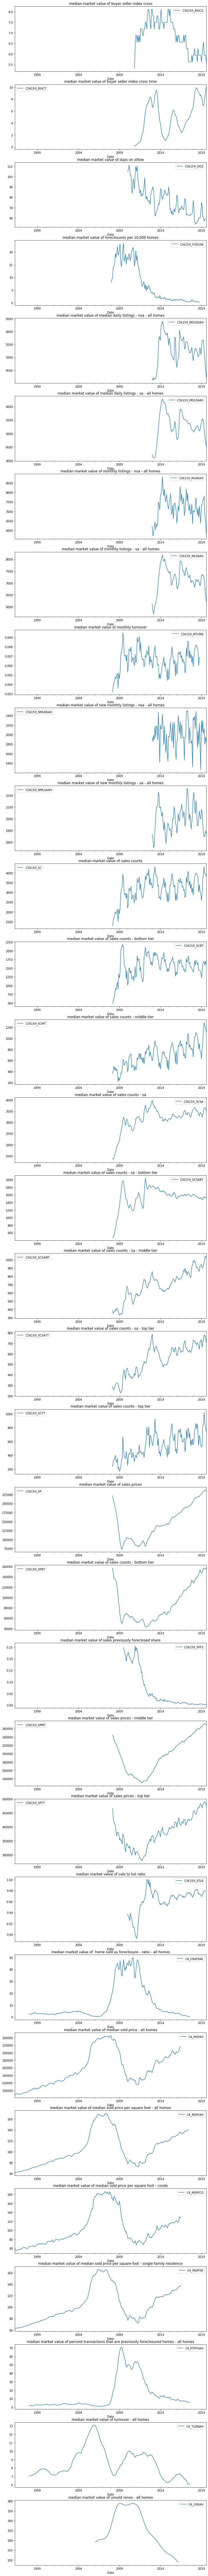

In [109]:
# Plot all series
series = len(df.columns)-1
figs = plt.figure(figsize=(12,5*series))
ax_count = 0
for code in df.columns:
    if code!="Date":
        plot_number = ax_count+1
        description = labelsdf[labelsdf["code"]==code].iat[0,1]
        ax = figs.add_subplot(series,1,plot_number)
        df.plot(x='Date',y=code,ax=ax)
        ax.set_title(description)
        ax_count += 1
figs.savefig(f"charts.png")